# TOC

 - [Simple Example](0-simple-example.ipynb)
 - [Simple Example Symbolic](1-simple-example-symblic.ipynb)

In [2]:
import astunparse

from moa.frontend import parse
from moa.visualize import visualize_ast, print_ast
from moa.shape import calculate_shapes
from moa.dnf import reduce_to_dnf
from moa.onf import reduce_to_onf
from moa.backend import generate_python_source

# Frontend

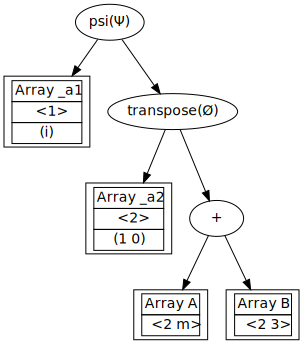

In [20]:
symbol_table, tree = parse('<i> psi (<1 0> tran(A ^ <2 m> + B ^ <2 3>))')
visualize_ast(symbol_table, tree)

# Shape Analysis

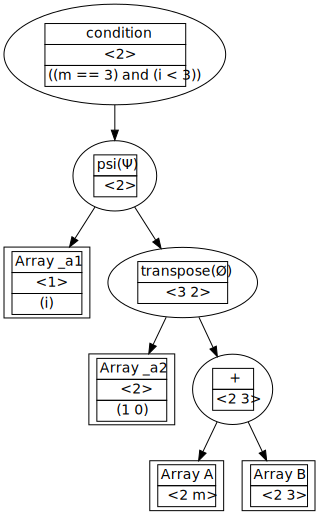

In [21]:
shape_symbol_table, shape_tree = calculate_shapes(symbol_table, tree)
visualize_ast(shape_symbol_table, shape_tree)

# Reduction to Denotational Normalized Format (DNF)

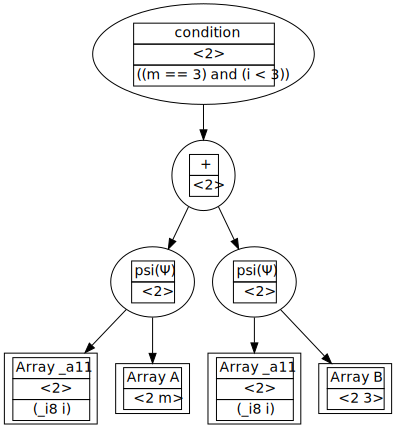

In [22]:
dnf_symbol_table, dnf_tree = reduce_to_dnf(shape_symbol_table, shape_tree)
visualize_ast(dnf_symbol_table, dnf_tree)

# Reduction to ONF

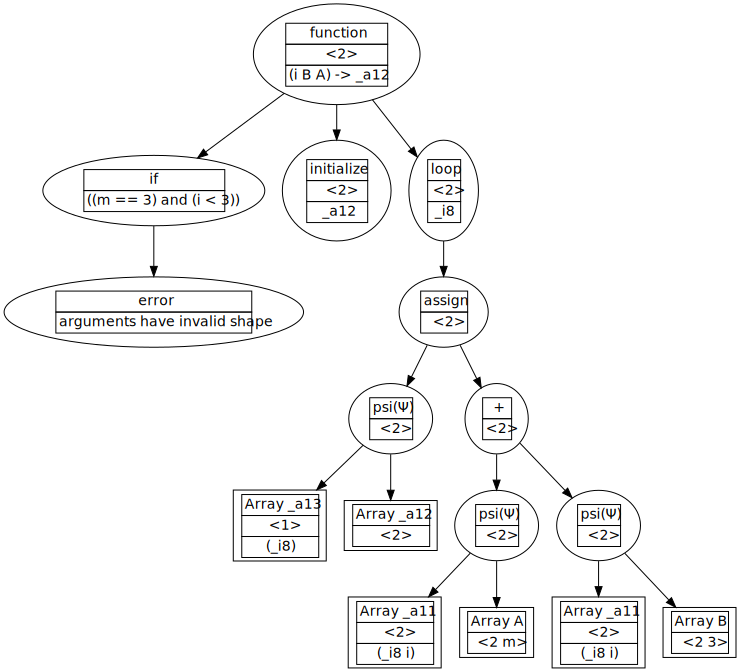

In [23]:
onf_symbol_table, onf_tree = reduce_to_onf(dnf_symbol_table, dnf_tree)
visualize_ast(onf_symbol_table, onf_tree)

# Backend (Python)

Execute generated python source.

Condition statements are not rendered yet to python source.

In [24]:
source = generate_python_source(onf_symbol_table, onf_tree, materialize_scalars=True)
print(source)



def f(i, B, A):
    
    pass
    
    _a12 = Array((2,))
    
    for _i8 in range(0, 2):
        
        _a12[(_i8,)] = (A[(_i8, i)] + B[(_i8, i)])
    return _a12


In [26]:
exec(source)

In [27]:
from moa.array import Array

In [28]:
A = Array((2, 3), (1, 2, 3, 4, 5, 6))
B = Array((2, 3), (7, 8, 9, 10, 11, 12))

array = f(0, B, A)

In [29]:
array.shape

(2,)

In [30]:
array.value

[8, 14]